In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from imblearn.metrics import sensitivity_specificity_support
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from IPython.core.display import display, HTML
from IPython.core.display import Image
from sklearn import preprocessing

%matplotlib inline

<h2>Funções</h2>
<h15><hr></h15>
<h4>- Foram usadas 3 funções, uma para para chamar o método de clusterização KMeans, outra para o Agglomerative Clustering (relativo ao hierárquico)</h4>
<h4>- Outrossim, fora usada a função scatterplot para exibir os gráficos de resultado da clusterização</h4>

In [2]:
def F_KMeans(X, number_clusters, maximum_iter):
    model = KMeans(n_clusters = number_clusters, random_state = 0, max_iter = maximum_iter)
    model.fit(X)
    labels = model.labels_
    center = model.cluster_centers_
    return(labels, center)

def F_Agglomerative(X, number_clusters, f_linkage):
    model = AgglomerativeClustering(n_clusters = number_clusters, linkage = f_linkage)
    labels = model.fit_predict(X)
    return labels

def Scatter(title, edg, col, size):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(football_data['general_league_position'], football_data['category'], edgecolor=edg, c=col[0],s=size)
    ax.set_title(title)
    plt.colorbar(scatter)
    plt.show(scatter)

<h4>- Abrindo o arquivo e alterando linhas em que com valores contendo vírgulo, o que denota que o valor está na casa de 4 ou mais dígitos</h4>
<h4>- Os algoritmos de clustering não reconheceram esses valores como numéricos, e portanto foi necessário retirar as vírgulas e fazer um casting transformando os valores para número</h4>

In [3]:
football_file = 'epl_1819.csv'
football_data = pd.read_csv(football_file)

football_data['attack_passes'] = football_data['attack_passes'].str.replace(',','').astype(float)
football_data['attack_passes_long'] = football_data['attack_passes_long'].str.replace(',','').astype(float)
football_data['attack_passes_back'] = football_data['attack_passes_back'].str.replace(',','').astype(float)
football_data['defence_clearances'] = football_data['defence_clearances'].str.replace(',','').astype(float)

football_data['attack_passes_back']

<h4>- Essa parte apresenta as classificações dos times bem como a sua clusterização correta , baseado na ida ou não para competições internacionais,</h4>
<h4>levando em conta a posição do time na tabela. Para K = Quantidade de grupos (clusters) = 6</h4>
<h4>- Para esse e os próximos resultados cada cluster na imagem criada é representada por uma cor diferente</h4>

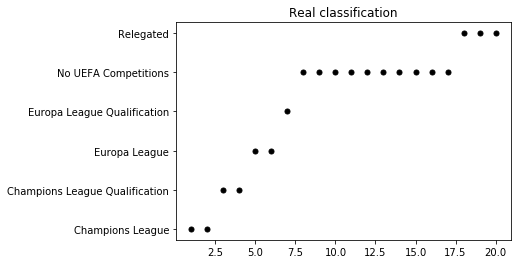

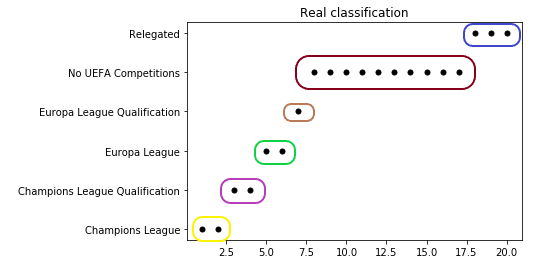

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(football_data['general_league_position'], football_data['category'], color='black', s=25)
ax.set_title('Real classification')
plt.show(scatter)
a = Image('real.png')
display(a)

<h1>KMeans</h1>
<h15><hr></h15>
<h4>- Aplicação do método KMeans que particionará as N observações em K grupos, e, cada observação pertence ao grupo mais próximo da média</h4>
<h4>- A priori o algoritmo foi testado com K = 6, que representa a quantidade de classificações posíveis do time na Premier League</h4>
<h4>- Percebe-se que a previsão não teve uma acurácia perfeita, no entanto, ainda é possível observar uma relação com a clusterização correta</h4>
<h4>- Para o KMeans, com K = 6 o que <strong>aparentemente</strong> ocorreu é que houveram 5 times rebaixados <font color="red">(cluster vermelho)</font>, 6 times que não foram para competição alguma nem foram rebaixados <strong>(cluster preto)</strong>- (a cor do cluster é dada pelo círculo ao redor dos pontos)</h4> 
<h4>3 equipes fora para a classificação da Europa League <font color="purple">(cluster roxo)</font>, uma equipe obteve classificação direta para Europa League <font color="green">(cluster verde)</font></h4>
<h4>4 equipes poderão disputar a fase de qualificação da Champions League <font color="blue">(cluster azul)</font> e uma equipe que vai para a Champions League diretamente <font color="pink">(cluster rosa)</font></h4>
<h4>- Vale ressaltar que esses valores de grupos que foram criados são o que aparenta estar sendo agrupado dada a quantidade de cada grupo na amostra original e a proximidade das amostras</h4>

In [5]:

lab, cen = F_KMeans(X, 6, 300)
kmeans = pd.DataFrame(lab)
football_data.insert(2, 'K-Classes', kmeans)

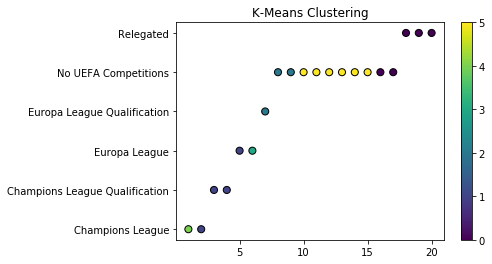

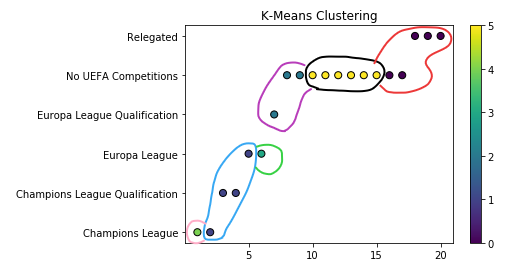

In [6]:
before_KMeans = Scatter('K-Means Clustering', 'black', kmeans, 50)
before_KMeans
Image('kmeans.png')

<h1>Agglomerative Clustering</h1>
<h15><hr></h15>
<h4>- É um dos tipos mais comuns de clusters hierárquicos, o algoritmo segue uma linha bottom-up, e começa com cada ponto sendo um cluster diferente e a cada etapa do algoritmo pares de clusters mais semelhantes são combinados em um enquanto a função se desenvole até ser formado apenas um cluster, funciona como uma árvore, ao fim, os clusters serão cortados em alguma etapa do processo de clusterização por semelhança, obtendo os resultados desejados; a geração em que ocorre o corte varia com a quantidade de clusters que é desejada</h4>
<h4>- Os resultados foram deveras semelhente aos obtidos pelo KMeans, a diferença foi que presumivelmente ele tenha clusterizado mais um rebaixado, e retirou uma equipe das que não foram para nenhuma competição da UEFA</h4>


In [7]:
lab_hier = F_Agglomerative(X, 6, 'ward')
aggl = pd.DataFrame(lab_hier)
football_data.insert(3, 'Agglomerative-Classes', aggl)

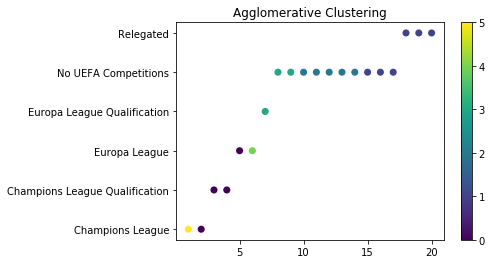

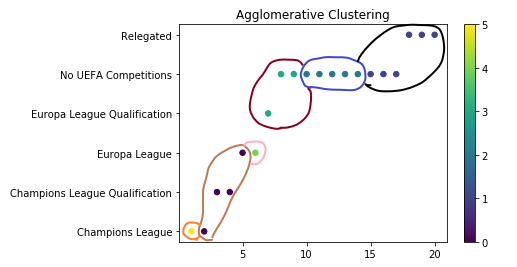

In [8]:
Scatter('Agglomerative Clustering', 'None', aggl, 50)
Image('aggl.png')

<h3>Testando as funções de clustering com diferentes números de clusters</h3>
<h15><hr></h15>
<h4>- O que pôde ser observado é que os resultados foram idênticos, mudando apenas os valores - que são meramente ilustrativos -, pois eles apenas representam pontos que estão no mesmo cluster, sendo este cluster representado pelo valor</h4>

In [9]:
for i in [2, 5, 10]:
    lab_k, cent_k = F_KMeans(X, i, 300)
    lab_ag = F_Agglomerative(X, i, 'ward')
    print("Labels formadas a partir do Kmeans, para K = {0}:\n{1}".format(i, lab_k))
    print("Labels formadas a partir do Agglomerative Clustering, para K = {0}:\n{1}".format(i, lab_ag))
    print('-'*50)

Labels formadas a partir do Kmeans, para K = 2:
[1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Labels formadas a partir do Agglomerative Clustering, para K = 2:
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
--------------------------------------------------
Labels formadas a partir do Kmeans, para K = 5:
[3 1 1 1 1 2 4 4 4 0 0 0 0 0 0 0 0 0 0 0]
Labels formadas a partir do Agglomerative Clustering, para K = 5:
[2 1 1 1 1 4 3 3 3 0 0 0 0 0 0 0 0 0 0 0]
--------------------------------------------------
Labels formadas a partir do Kmeans, para K = 10:
[3 9 1 7 7 2 5 6 6 0 0 0 0 0 4 4 4 4 8 8]
Labels formadas a partir do Agglomerative Clustering, para K = 10:
[5 9 6 2 2 4 8 7 7 0 0 0 0 0 1 1 1 1 3 3]
--------------------------------------------------


<h2>Alterando parâmetros de max iter e o linkage do hierárquico</h2>
<h15><hr></h15>
<h3><u>O valor de K fixado foi 6</u></h3>
<h4>- Explanando as mudanças no linkage (relacionado a distância entre os sets agrupados); o 'ward' vai minimizar a variância dos clusters agrupados; 'average' vê a média das distâncias de cada observação em 2 sets; 'complete' usa a máxima distância de todas as observações entre os 2 sets e 'single' usa mínima distância de todas as observações entre 2 sets</h4>
<h4>- E max iter está relacionado ao número de iterações necessários para completar uma época</h4>
<h4>- Analisando os resultados; kmeans (max_iter) para 1, 10, 100, 1000; todos darão o mesmo resultado, como o dataset é pequeno, a época total é atiginda com facilidade mesmo para um pequeno número máximo de iterações</h4>
<h4>- Já linkage, para cada um será obtido um resultado diferente, pelas razões supracitadas dada a divergência de manejo do agrupamento</h4>

In [31]:
for i in [1, 10, 100, 1000]:
    lab_k, cent_k = F_KMeans(X, 6, i)
    if i == 1:
        lab_ag = F_Agglomerative(X, 6, 'ward')
        linkage = 'ward'
    if i == 10:
        lab_ag = F_Agglomerative(X, 6, 'complete')
        linkage = 'complete'
    if i == 100:
        lab_ag = F_Agglomerative(X, 6, 'average')
        linkage = 'average'
    if i == 1000:
        lab_ag = F_Agglomerative(X, 6, 'single')
        linkage = 'single'
        
    print("Labels formadas a partir do Kmeans, para max iter = {0}:\n{1}".format(i, lab_k))
    print("Labels formadas a partir do Agglomerative Clustering, para linkage = {0}:\n{1}".format(linkage, lab_ag))
    scatter
    print('-'*50)

Labels formadas a partir do Kmeans, para max iter = 1:
[3 1 1 1 1 2 4 4 4 0 0 0 0 0 5 5 5 5 5 5]
Labels formadas a partir do Agglomerative Clustering, para linkage = ward:
[5 0 0 0 0 4 3 3 3 2 2 2 2 2 1 1 1 1 1 1]
--------------------------------------------------
Labels formadas a partir do Kmeans, para max iter = 10:
[4 1 1 1 1 3 2 2 2 5 5 5 5 5 5 0 0 0 0 0]
Labels formadas a partir do Agglomerative Clustering, para linkage = complete:
[3 0 0 0 0 4 2 2 2 1 1 1 1 1 1 1 1 1 5 5]
--------------------------------------------------
Labels formadas a partir do Kmeans, para max iter = 100:
[4 1 1 1 1 3 2 2 2 5 5 5 5 5 5 0 0 0 0 0]
Labels formadas a partir do Agglomerative Clustering, para linkage = average:
[5 0 0 0 0 3 1 1 1 4 4 4 4 4 4 4 4 4 2 2]
--------------------------------------------------
Labels formadas a partir do Kmeans, para max iter = 1000:
[4 1 1 1 1 3 2 2 2 5 5 5 5 5 5 0 0 0 0 0]
Labels formadas a partir do Agglomerative Clustering, para linkage = single:
[5 2 1 1 1 3 4 0 0

<h2>Comparação entre os algoritmos</h2>
<h15><hr></h15>
<h4>- Dado que os resultados obtidos foram extremamente semelhantes (identicos no caso da alteração apenas do número de clusters [2, 5, 10]) e vendo que dataset é muito pequeno, a noção de desempenho superior não fica muito clara</h4>
<h4>- No entanto, para K = 6, o algoritmo de KMeans obteve um resultado um pouco mais semelhante que o agrupamento do próprio modelo, com um rebaixado a menos e um time a mais sem competições UEFA em relação ao Agglomerative Clustering</h4>

<h1><strong>BÔNUS</strong></h1>

<h3>Normalização dos dados</h3>

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
# Novo valor de X, variando de [0, 1]
X_scaled = min_max_scaler.fit_transform(X)

Bonus_KMeans, bon_cent = F_KMeans(X_scaled, 6, 300)
print('Novas Labels formadas a partir do KMeans após a normalização:\n{}'.format(Bonus_KMeans))

Bonus_Aggl = F_Agglomerative(X_scaled, 6, 'ward')
print('Novas Labels formadas a partir do Agglomerative Clustering após a normalização:\n{}'.format(Bonus_Aggl))

Novas Labels formadas a partir do KMeans após a normalização:
[1 1 1 3 3 3 0 0 0 0 0 4 0 2 2 4 2 2 2 5]
Novas Labels formadas a partir do Agglomerative Clustering após a normalização:
[3 3 3 5 5 5 1 0 0 1 1 0 1 1 2 0 1 2 2 4]


In [17]:
bonus_kmeans = pd.DataFrame(Bonus_KMeans)
football_data.insert(2, 'K-Classes after normalization', bonus_kmeans)

<h3>Através da análise dos valores pós-normalização percebe-se que amostra se encontra bem mais disforme, e aparentemente menos aproximada do agrupamento correto</h3>

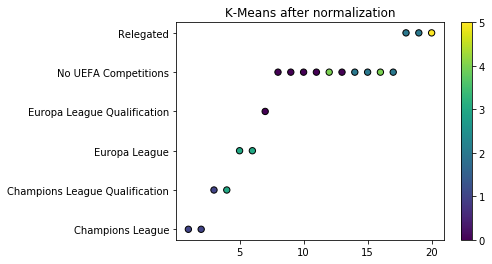

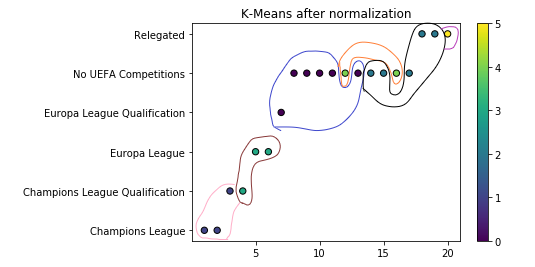

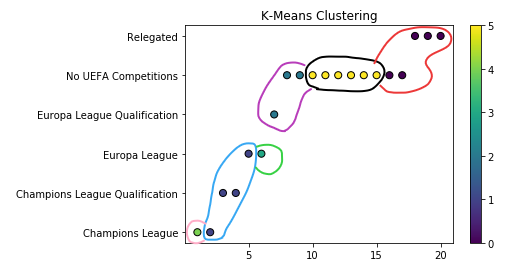

In [19]:
a = Scatter('K-Means after normalization', 'black', bonus_kmeans, 40)
plt.show(a)
x = Image('kmeans.png')
y = Image('bonus_kmeans.png')
display(y, x)

In [14]:
bonus_aggl = pd.DataFrame(Bonus_Aggl)
football_data.insert(2, 'Agglomerative Clustering after normalization', bonus_aggl)

<h3>Agglomerative Clustering também gerou resultados bastante divergentes da amostra original</h3>

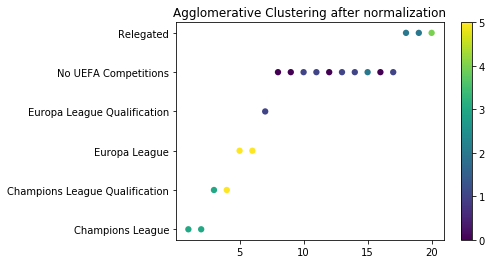

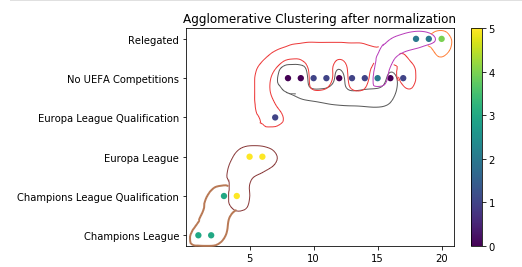

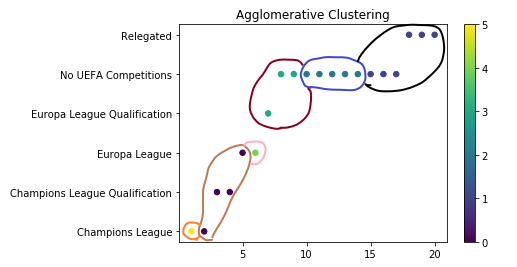

In [22]:
b = Scatter('Agglomerative Clustering after normalization', 'None', bonus_aggl, 40)
plt.show(a)
x = Image('aggl.png')
y = Image('bonus_aggl.png')
display(y, x)

<h3>Boxplots</h3>
<h15><hr><h15>
<h4>dos agrupamentos plotados para antes e depois da normalização, no gráfico do K-Means, nada muito significante pôde ser notado, apenas que a maior parte dos labels agora variam em uma faixa de valores menores</h4>

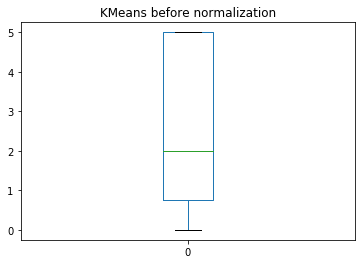

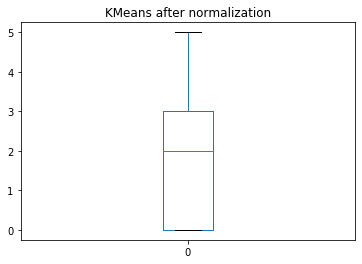

In [15]:
new_X = football_data.drop(['category', 'Team', 'Agglomerative Clustering after normalization', 
                            'K-Classes after normalization', 'K-Classes', 'Agglomerative-Classes'], axis=1)
#print(new_X)
k = kmeans.plot(kind='box', title='KMeans before normalization')
plt.show(k)
b_k = bonus_kmeans.plot(kind='box', title='KMeans after normalization')
plt.show(b_k)

<h4>Pode-se perceber que para o agglomerative o valor do outlier não existe mais</h4>

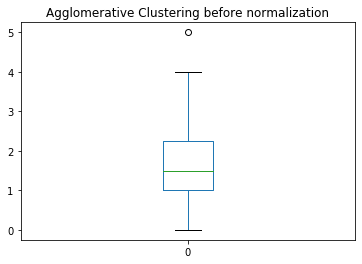

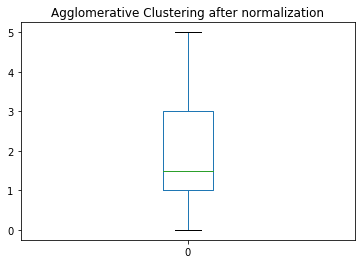

In [16]:
a = aggl.plot(kind='box', title='Agglomerative Clustering before normalization')
plt.show(a)
b_a = bonus_aggl.plot(kind='box', title='Agglomerative Clustering after normalization')
plt.show(b_a)